# This is a sample jupyter notebook to generate the prediction for competition submission
- For detail documentation, please visit https://rocket-capital-investment.gitbook.io/rci-tournament/


Download and import custom module from RCI repo to get latest dataset from IPFS


In [ ]:
# download custom module from RCI github repo which enable us to download dataset directly from IPFS
!wget -O dataloader.py https://raw.githubusercontent.com/rocketcapital-ai/competition_quickstart_dataloader/main/dataloader.py

# import modules
import sys, zipfile
from google.colab import files

# append the directory of downloaded custom module to system path so we can import it
sys.path.append('/content/')

# install base58 module to decrpt the dataset
!pip install base58

# import the downloaded module
from dataloader import download_dataset

# fill in your IPFS gateway url here
my_gateway = 'https://gateway.pinata.cloud'

# fill in your pinata access token here (if applicable)
pinata_access_token = ""

# download and unzip latest dataset from IPFS
filename = download_dataset(my_gateway, access_token=None if pinata_access_token == "" else pinata_access_token)

## Loading train, test, validation data

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

train_dataset  = pd.read_csv('/content/dataset/train_dataset.csv', index_col = 'date')
validation_dataset  = pd.read_csv('/content/dataset/validation_dataset.csv', index_col = 'date')


In [3]:
# first column (symbol) is the ticker
# 'target_updown' is the return of a given crypto, such that final_price / initial_price - 1
# 'target_neutral' is the rank by Era using 'target_updown'
# the rest of the columns are features to be used for ML
train_dataset.head()

,symbol,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1133,feature_1134,feature_1135,feature_1136,feature_1137,feature_1138,feature_1139,feature_DC1,target_neutral,target_updown
date,,,,,,,,,,,,,,,,,,,,,
2018-04-29,BTC,0.025641,0.000000,0.000000,0.923077,0.000000,0.897436,0.051282,0.000000,0.000000,...,0.641026,0.589744,0.589744,0.666667,0.820513,0.820513,0.871795,0.410256,0.743590,0.025026
2018-04-29,PRE,0.333333,0.076923,0.025641,0.025641,0.641026,0.487179,0.153846,0.179487,0.051282,...,0.820513,0.641026,0.564103,0.692308,0.743590,0.717949,0.820513,0.358974,0.487179,-0.021821
2018-04-29,QSP,0.589744,0.589744,0.512821,0.564103,0.512821,0.410256,0.461538,0.230769,0.179487,...,0.102564,0.051282,0.051282,0.102564,0.153846,0.153846,0.153846,0.384615,0.948718,0.219413
2018-04-29,ADA,0.846154,0.717949,0.743590,0.743590,0.102564,0.641026,0.717949,0.743590,0.256410,...,0.435897,0.615385,0.666667,0.487179,0.410256,0.512821,0.282051,0.871795,0.410256,-0.041188
2018-04-29,TRAC,0.384615,0.358974,0.410256,0.384615,0.564103,0.256410,0.307692,0.384615,0.512821,...,0.692308,0.794872,0.846154,0.717949,0.846154,0.897436,0.743590,0.333333,0.820513,0.114197


In [4]:
# validation_dataset is the latest data from most recent Era
# it has the same structure as the dataset, however 'target_updown' and 'target_neutral' are NaN
validation_dataset.head()

,symbol,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1133,feature_1134,feature_1135,feature_1136,feature_1137,feature_1138,feature_1139,feature_DC1,target_neutral,target_updown
date,,,,,,,,,,,,,,,,,,,,,
2023-04-16,BTC,0.000000,0.001312,0.000000,0.002625,0.000000,0.998688,0.000000,0.998688,0.014436,...,0.664042,0.776903,0.835958,0.699475,0.880577,0.916010,0.807087,0.603675,NaN,NaN
2023-04-16,LTC,0.993438,0.989501,0.988189,0.986877,0.979003,0.986877,0.986877,0.980315,0.993438,...,0.427822,0.534121,0.572178,0.469816,0.564304,0.614173,0.506562,0.766404,NaN,NaN
2023-04-16,TRX,0.026247,0.047244,0.032808,0.898950,0.040682,0.030184,0.044619,0.022310,0.017060,...,0.367454,0.528871,0.598425,0.429134,0.640420,0.716535,0.551181,0.292651,NaN,NaN
2023-04-16,DOGE,0.006562,0.960630,0.898950,0.988189,0.982940,0.964567,0.013123,0.935696,0.979003,...,0.324147,0.388451,0.423885,0.364829,0.465879,0.500000,0.406824,0.753281,NaN,NaN
2023-04-16,XMR,0.858268,0.148294,0.028871,0.973753,0.879265,0.145669,0.926509,0.125984,0.851706,...,0.225722,0.283465,0.368766,0.215223,0.450131,0.559055,0.346457,0.433071,NaN,NaN


## Create X and y from dataset
- Currently there are 2 competitions user could participate:
- (i) UpDown (using target_updown as target)
- (ii) Market Neutral (using target_neutral as target)

In [5]:
# X is all the columns except the 'symbol', 'target_updown', 'target_neutral'
X = train_dataset.iloc[:, 1:-2]

# y is just the target
y_updown = train_dataset.target_updown
y_neutral = train_dataset.target_neutral

# symbols
symbols = train_dataset.symbol

In [6]:
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1131,feature_1132,feature_1133,feature_1134,feature_1135,feature_1136,feature_1137,feature_1138,feature_1139,feature_DC1
date,,,,,,,,,,,,,,,,,,,,,
2018-04-29,0.025641,0.000000,0.000000,0.923077,0.000000,0.897436,0.051282,0.000000,0.000000,0.871795,...,0.769231,0.794872,0.641026,0.589744,0.589744,0.666667,0.820513,0.820513,0.871795,0.410256
2018-04-29,0.333333,0.076923,0.025641,0.025641,0.641026,0.487179,0.153846,0.179487,0.051282,0.153846,...,0.743590,0.871795,0.820513,0.641026,0.564103,0.692308,0.743590,0.717949,0.820513,0.358974
2018-04-29,0.589744,0.589744,0.512821,0.564103,0.512821,0.410256,0.461538,0.230769,0.179487,0.256410,...,0.153846,0.205128,0.102564,0.051282,0.051282,0.102564,0.153846,0.153846,0.153846,0.384615
2018-04-29,0.846154,0.717949,0.743590,0.743590,0.102564,0.641026,0.717949,0.743590,0.256410,0.717949,...,0.512821,0.307692,0.435897,0.615385,0.666667,0.487179,0.410256,0.512821,0.282051,0.871795
2018-04-29,0.384615,0.358974,0.410256,0.384615,0.564103,0.256410,0.307692,0.384615,0.512821,0.461538,...,0.846154,0.769231,0.692308,0.794872,0.846154,0.717949,0.846154,0.897436,0.743590,0.333333


In [7]:
y_updown.head()

date
2018-04-29    0.025026
2018-04-29   -0.021821
2018-04-29    0.219413
2018-04-29   -0.041188
2018-04-29    0.114197
Name: target_updown, dtype: float64

In [8]:
y_neutral.head()

date
2018-04-29    0.743590
2018-04-29    0.487179
2018-04-29    0.948718
2018-04-29    0.410256
2018-04-29    0.820513
Name: target_neutral, dtype: float64

## Split X, y into train and test

In [9]:
train = 0.9
test = 0.1
era = len(X.index.unique())
train_era = int(era * train)
test_era = era - train_era
print('total Era: {}'.format(era))
print('train Era: {}'.format(train_era))
print('test Era: {}'.format(test_era))


total Era: 259
train Era: 233
test Era: 26


In [10]:
#split train and test set according to the train_era and test_era
X_train = X[X.index < X.index.unique()[train_era]]
y_updown_train = y_updown[y_updown.index < y_updown.index.unique()[train_era]]
y_neutral_train = y_neutral[y_neutral.index < y_neutral.index.unique()[train_era]]
symbols_train = symbols[symbols.index < symbols.index.unique()[train_era]]

X_test = X[X.index >= X.index.unique()[train_era]]
y_updown_test = y_updown[y_updown.index >= y_updown.index.unique()[train_era]]
y_neutral_test = y_neutral[y_neutral.index >= y_neutral.index.unique()[train_era]]
symbols_test = symbols[symbols.index >= symbols.index.unique()[train_era]]

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))


X_train shape: (96002, 1140)
X_test shape: (19503, 1140)


## As stated in the white paper, for both competitions, the goodness of the predictions will be measured using the portfolio return of 36 tradeable assets (subject to change) as state below:

In [11]:
dydx_ticker_list = ['1INCH', 'AAVE', 'ADA', 'ALGO', 'ATOM', 'AVAX', 'BCH', 'BTC', 'CELO', 'COMP', 'CRV', 'DOGE', 'DOT', 'ENJ', 
                    'EOS', 'ETC', 'ETH', 'FIL', 'ICP', 'LINK', 'LTC', 'MATIC', 'MKR', 'NEAR', 'RUNE', 'SNX', 'SOL', 'SUSHI', 
                    'TRX', 'UMA', 'UNI', 'XLM', 'XMR', 'XTZ', 'YFI', 'ZEC', 'ZRX']

## Each era representing a set of cryptocurrency assets for the time period, the number of assets within each Era is different

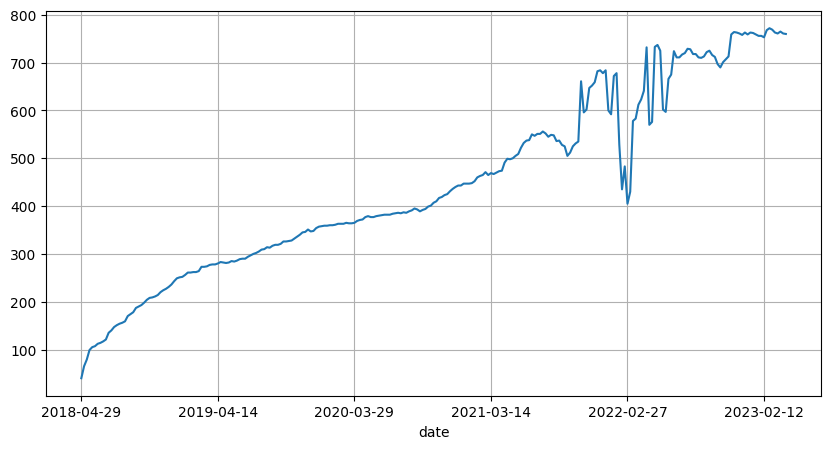

In [12]:
train_dataset.groupby(train_dataset.index).count().iloc[:,0].plot(figsize = (10,5), grid=True);

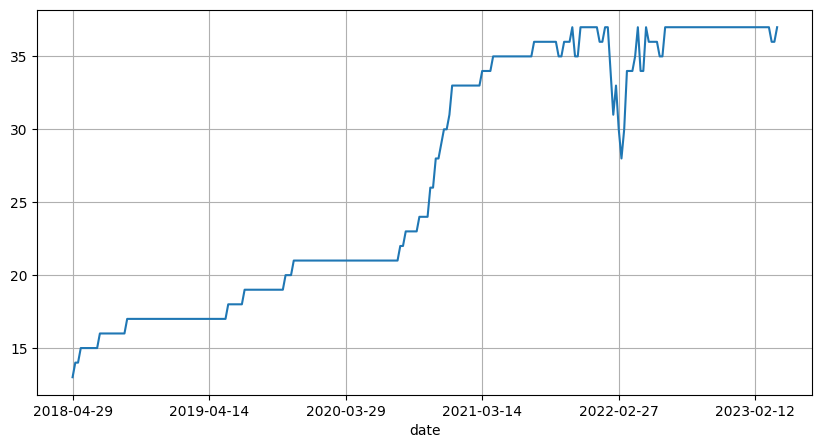

In [13]:
dydx_subset_df = train_dataset[train_dataset.symbol.isin(dydx_ticker_list)]
dydx_subset_df.groupby(dydx_subset_df.index).count().iloc[:,0].plot(figsize = (10,5), grid=True);

# For MARKET NEUTRAL competition

## We could use simple Linear Regression to train a model and check the Spearman correlation

In [14]:
from sklearn.linear_model import LinearRegression

reg_market_neutral = LinearRegression(n_jobs=-1).fit(X_train, y_neutral_train)

In [15]:
# function to calculate Spearman correlation by era (mean, std, max, min)

def spearman_by_era(prediction, target):
    df = pd.DataFrame(index=target.index,
                    data = {'prediction': prediction,
                            'target': target}
                    )
  
    spearman_era_list = []
    for era in df.index.unique():
        era_df = df[df.index == era]
        spearman_corr = sp.stats.spearmanr(era_df.prediction, era_df.target)[0]
        spearman_era_list.append(spearman_corr)

    mean = round(np.mean(spearman_era_list), 4)
    std = round(np.std(spearman_era_list), 4)
    max = round(np.max(spearman_era_list), 4)
    min = round(np.min(spearman_era_list), 4)
    return mean, std, max, min

# function to calculate portfolio return by era (mean, std, max, min)

def calculate_return(symbols, prediction, actual_return):
    df = pd.DataFrame(index=actual_return.index,
                    data = {'symbol': symbols,
                            'prediction': prediction,
                            'actual_return': actual_return}
                    )
    
    dfs = df[df.symbol.isin(dydx_ticker_list)]
    
    return_era_list = []
    for era in dfs.index.unique():
        era_df = dfs[dfs.index == era]
        
        # re-rank predictions to build a market neutral strategy
        ranks = sp.stats.rankdata(era_df.prediction)
        norm_ranks = [(r - 1) / (len(ranks) - 1) for r in ranks]

        # compute allocations
        tot = sum((abs(2 * n - 1) for n in norm_ranks))
        allocations = [(2 * n - 1) / tot for n in norm_ranks]
        
        # compute gain as dot product between allocation and relative deltas
        pct_gain = np.dot(allocations, era_df.actual_return)
        
        return_era_list.append(pct_gain)

    mean = round(np.mean(return_era_list), 4)
    std = round(np.std(return_era_list), 4)
    max = round(np.max(return_era_list), 4)
    min = round(np.min(return_era_list), 4)
    return mean, std, max, min

y_pred_train = reg_market_neutral.predict(X_train)
train_spearman = spearman_by_era(y_pred_train, y_neutral_train)
print('Train dataset Spearman correlation by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(train_spearman[0],
                                                                                             train_spearman[1],
                                                                                             train_spearman[2],
                                                                                             train_spearman[3]))

y_pred_test = reg_market_neutral.predict(X_test)
test_spearman = spearman_by_era(y_pred_test, y_neutral_test)
print('Test dataset Spearman correlation by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(test_spearman[0],
                                                                                             test_spearman[1],
                                                                                             test_spearman[2],
                                                                                             test_spearman[3]))

train_return = calculate_return(symbols_train, y_pred_train, y_updown_train)
print('Train dataset return by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(train_return[0],
                                                                                 train_return[1],
                                                                                 train_return[2],
                                                                                 train_return[3]))

test_return = calculate_return(symbols_test, y_pred_test, y_updown_test)
print('Test dataset return by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(test_return[0],
                                                                                 test_return[1],
                                                                                 test_return[2],
                                                                                 test_return[3]))


Train dataset Spearman correlation by era: mean = 0.1759 ; std = 0.0765 ; max = 0.3702 ; min = -0.0874
Test dataset Spearman correlation by era: mean = 0.0922 ; std = 0.0849 ; max = 0.3257 ; min = -0.079
Train dataset return by era: mean = 0.007 ; std = 0.0336 ; max = 0.1818 ; min = -0.1263
Test dataset return by era: mean = 0.0037 ; std = 0.0128 ; max = 0.0343 ; min = -0.0266


In [16]:
# Use the trained Linear Regression model to make prediction on latest data

X_validation = validation_dataset.iloc[:, 1:-2]
y_validation_market_neutral = reg_market_neutral.predict(X_validation)

y_validation_market_neutral[:5]

array([0.5582291 , 0.44799612, 0.48485866, 0.56161937, 0.51975175])

## Let's use the prediction from linear regression to join with validation dataset symbol for submission

In [17]:
prediction_market_neutral = pd.DataFrame()
prediction_market_neutral['symbol'] = list(validation_dataset.symbol)
prediction_market_neutral['prediction'] = y_validation_market_neutral
prediction_market_neutral = prediction_market_neutral[prediction_market_neutral.symbol.isin(dydx_ticker_list)]

# sort the prediction to check which symbol is weaker and stronger, ie. NEAR is weakest; AVAX is strongest
prediction_market_neutral.sort_values('prediction')

,symbol,prediction
305,NEAR,0.421081
433,ICP,0.435430
93,LINK,0.439461
20,ADA,0.444489
1,LTC,0.447996
44,ZRX,0.454332
171,SNX,0.457193
289,SUSHI,0.459299
346,1INCH,0.463223
207,RUNE,0.463287


## Check is the prediction in accordance for submission format

In [18]:
#check if y_latest is in accordance to shape for submission and required symbols
if set(prediction_market_neutral.symbol) == set(dydx_ticker_list):
    print('symbol matched!')
else:
    print('symbol unmatched, the symbol in prediction df must match the symbol in validation_dataset...')
    
if prediction_market_neutral.shape[1] == 2:
    print('column counts ok!')
else:
    print('It should have 2 columns, first column with symbol, second with prediction...')


symbol matched!
column counts ok!


## Output prediction as a .csv file for submission!

In [19]:
#Output submission as .csv file which stored in content/prediction folder
import os
if not os.path.exists('/content/prediction'):
    os.makedirs('/content/prediction')
prediction_market_neutral.to_csv('/content/prediction/prediction_market_neutral.csv', index = False, header = None)

# For UPDOWN competition

## For demonstration we could also use Linear Regression to train a model and check the RMSE

In [20]:
reg_updown = LinearRegression(n_jobs=-1).fit(X_train, y_updown_train)

In [21]:
# function to calculate RMSE by era (mean, std, max, min)

from sklearn.metrics import mean_squared_error

def rmse_by_era(prediction, target):
    df = pd.DataFrame(index=target.index,
                    data = {'prediction': prediction,
                            'target': target}
                    )
  
    rmse_era_list = []
    for era in df.index.unique():
        era_df = df[df.index == era]
        rmse = mean_squared_error(era_df.prediction, era_df.target, squared=False)
        rmse_era_list.append(rmse)
        
    mean = round(np.mean(rmse_era_list), 4)
    std = round(np.std(rmse_era_list), 4)
    max = round(np.max(rmse_era_list), 4)
    min = round(np.min(rmse_era_list), 4)
    return mean, std, max, min


y_pred_train = reg_updown.predict(X_train)
train_rmse_stat = rmse_by_era(y_pred_train, y_updown_train)
print('Train dataset RMSE by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(train_rmse_stat[0],
                                                                             train_rmse_stat[1],
                                                                             train_rmse_stat[2],
                                                                             train_rmse_stat[3]))
y_pred_test = reg_updown.predict(X_test)
test_rmse_stat = rmse_by_era(y_pred_test, y_updown_test)
print('Test dataset RMSE by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(test_rmse_stat[0],
                                                                             test_rmse_stat[1],
                                                                             test_rmse_stat[2],
                                                                             test_rmse_stat[3]))

train_return = calculate_return(symbols_train, y_pred_train, y_updown_train)
print('Train dataset return by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(train_return[0],
                                                                                 train_return[1],
                                                                                 train_return[2],
                                                                                 train_return[3]))

test_return = calculate_return(symbols_test, y_pred_test, y_updown_test)
print('Test dataset return by era: mean = {} ; std = {} ; max = {} ; min = {}'.format(test_return[0],
                                                                                 test_return[1],
                                                                                 test_return[2],
                                                                                 test_return[3]))

Train dataset RMSE by era: mean = 34.6552 ; std = 265.1129 ; max = 4072.5883 ; min = 12.2918
Test dataset RMSE by era: mean = 17.3201 ; std = 2.1446 ; max = 23.7913 ; min = 13.9168
Train dataset return by era: mean = 0.0021 ; std = 0.0326 ; max = 0.1786 ; min = -0.0819
Test dataset return by era: mean = 0.0008 ; std = 0.0199 ; max = 0.0524 ; min = -0.0396


In [22]:
# Use the trained Linear Regression model to make prediction on latest data

X_validation = validation_dataset.iloc[:, 1:-2]
y_validation_updown = reg_updown.predict(X_validation)

y_validation_updown[:5]

array([ -4.82967175,  19.64994217,   5.49084085,  -7.23850385,
       -20.52277649])

## Let's use the prediction from linear regression to join with validation dataset symbol for submission

In [23]:
prediction_updown = pd.DataFrame()
prediction_updown['symbol'] = list(validation_dataset.symbol)
prediction_updown['prediction'] = y_validation_updown
prediction_updown = prediction_updown[prediction_updown.symbol.isin(dydx_ticker_list)]

# sort the prediction to check which symbol is weaker and stronger, ie. XMR is weakest; SOL is strongest
prediction_updown.sort_values('prediction')

,symbol,prediction
4,XMR,-20.522776
7,ZEC,-17.819009
452,MATIC,-16.688637
3,DOGE,-7.238504
269,YFI,-6.376317
289,SUSHI,-5.653449
169,ATOM,-5.282829
36,ENJ,-5.078473
0,BTC,-4.829672
32,XTZ,-3.252802


## Check is the prediction in accordance for submission format

In [24]:
#check if y_latest is in accordance to shape for submission
if set(prediction_updown.symbol) == set(dydx_ticker_list):
    print('symbol matched!')
else:
    print('symbol unmatched, the symbol in prediction df must match the symbol in validation_dataset...')
    
if prediction_updown.shape[1] == 2:
    print('column counts ok!')
else:
    print('It should have 2 columns, first column with symbol, second with prediction...')


symbol matched!
column counts ok!


## Output prediction as a .csv file for submission!

In [25]:
#Output submission as .csv file which stored in content/prediction folder
import os
if not os.path.exists('/content/prediction'):
    os.makedirs('/content/prediction')
prediction_updown.to_csv('/content/prediction/prediction_updown.csv', index = False, header = None)